

# Project: Investigate TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Key notes**: "This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. There are some odd characters in the ‘cast’ column. The final two columns ending with “_adj” show the budget and revenue of the"
"associated movie in terms of 2010 dollars, accounting for inflation over time."

> **Questions to explore**: 
><ul>
><li><a href="#q1"> 1. What is the highest popularity score? Which movie is it corresponding to?</a></li>
><li><a href="#q2"> 2. What is the highest vote_count? Which movie is it corresponding to?</a></li>
><li><a href="#q3"> 3. What is the relationship between popularity and vote_count?</a></li> 
><li><a href="#q4"> 4. What are the best and worst box office records in terms of revenue_adj, and corredponding to >which leading actor, director and movies, respectively?</a></li>
><li><a href="#q5"> 5. What are the relationship bewteen popularity and box office as well vote_counts and box office?</a></li>
><li><a href="#q6"> 6. What are the highest and lowerest budgets? Which movies are they corrsponding to respectivly?</a></li>
><li><a href="#q7"> 7. Selecting 1983 as watershed, what is the total gross before and after it respectively?</a></li>
><li><a href="#q8"> 8. What is the sum of gross of all movies in 2009?</a></li>
><li><a href="#q9"> 9. In which day, month and year of release, respectively, the movies possess the highest box /office record ?</a></li>
><li><a href="#q10"> 10. Which actor/actress participated in most movies?</a></li>
><li><a href="#q11"> 11. Which compamy produced the most movies?</a></li>
><li><a href="#q12"> 12. What is the most frequent type of movie?</a></li>
><li><a href="#q13"> 13. Which leading actor/actress possess highest box office record by average and in total, >respectively?</a></li>
><li><a href="#q14"> 14. Does the highest ratio of revenue versus budget or budget versus revenue of movie suggest >anything?</a></li>
><li><a href="#q15"> 15. What is the distribution of box office?</a></li>
><li><a href="#q16"> 16. What is the distribution of vote_average?</a></li>
><li><a href="#q17"> 17. In which day, month and year does most movies released?</a></li>
><li><a href="#q18"> 18. What is the relationsip of budget and revenue?</a></li>
><li><a href="#q19"> 19. Does the lenghth of movie affect its revenue? Group the movie by the lengh intervals, eg, >below 120 mins, between 120 to 180 mins, above 180min, then compare the mean revenue of each group of movies?</a></li> 
><li><a href="#q20"> 20. Which genres are most popular from year to year?</a></li>
><li><a href="#q21"> 21. What kinds of properties are associated with movies that have high revenues?</a></li>




In [1]:
# Set up import statements for all of the packages that are planed to use
# Include a 'magic word' so that visualizations are plotted
# call on dataframe to display the first 5 rows

import pandas as pd
import numpy as np
import datetime
from statistics import mode
% matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_style('darkgrid')
df = pd.read_csv('tmdb-movies.csv')


<a id='wrangling'></a>
## Data Wrangling

> **Key notes**: In this section of the report, the following work will be done: load the data; check for cleanliness; trim and clean dataset for analysis.

### General Properties

In [2]:
# Load data and print out a few lines

df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# return a tuple of the dimensions of the dataframe

df.shape

(10866, 21)

In [4]:
# print the column labels in the dataframe

for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [5]:
# return the datatypes of the columns

df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# check for duplicates in the data

sum(df.duplicated())

1

In [7]:
#  check if any value is NaN in DataFrame and in how many columns

df.isnull().any().any(), sum(df.isnull().any())

(True, 9)

In [8]:
# displays a concise summary of the dataframe
# including the number of non-null values in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [9]:
df.release_year.sort_values(ascending=True).unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

In [10]:
# Generates descriptive statistics, excluding NaN values

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 

In [11]:
# drop duplicates
# confirm correction

df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [12]:
# As the NaN values are of string type therefore they can't be treated by filling with means
# Since they don't affect the arithmetic calculation nor satistical analysis
# so it is better to replace those NaN values with a common string type value which doesn't indicate anything

df.fillna('No record', inplace = True)
df.isnull().any().any()

False

In [13]:
# Generates descriptive statistics, excluding NaN values

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [14]:
# shouw columns

df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [15]:
# Filter the colmuns according to the exploring questions and export to a new dataframe
# Confirm the changes

df_analysis = df.iloc[:,np.r_[2:3, 5:7, 8, 12:21]]

df_analysis.columns

Index(['popularity', 'original_title', 'cast', 'director', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [16]:
# Set the index by 'original title'
# Confirm the changes

df_analysis.set_index('original_title', inplace =True)
df_analysis.index

Index(['Jurassic World', 'Mad Max: Fury Road', 'Insurgent',
       'Star Wars: The Force Awakens', 'Furious 7', 'The Revenant',
       'Terminator Genisys', 'The Martian', 'Minions', 'Inside Out',
       ...
       'The Ugly Dachshund', 'Nevada Smith',
       'The Russians Are Coming, The Russians Are Coming', 'Seconds',
       'Carry On Screaming!', 'The Endless Summer', 'Grand Prix',
       'Beregis Avtomobilya', 'What's Up, Tiger Lily?',
       'Manos: The Hands of Fate'],
      dtype='object', name='original_title', length=10865)

In [17]:
# Extract the leading actor from cast, and transfer them into a new column

df_analysis['lead'] = df_analysis.cast.apply(lambda x: x.split('|')[0])
df_analysis.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead
original_title,,,,,,,,,,,,,
Jurassic World,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
Mad Max: Fury Road,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy
Insurgent,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley
Star Wars: The Force Awakens,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford
Furious 7,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel


In [18]:
# Convert date infomation into datetime format

df_analysis['release_date'] = pd.to_datetime(df_analysis['release_date'], errors='coerce')
df_analysis.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead
original_title,,,,,,,,,,,,,
Jurassic World,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
Mad Max: Fury Road,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy
Insurgent,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley
Star Wars: The Force Awakens,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford
Furious 7,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel


<a id='eda'></a>
## Exploratory Data Analysis


<a id='q1'></a>
### Research Question 1: What is the highest popularity score? Which movie is it corresponding to?

In [19]:
# Find the index which points to the highest popuarity score

ind_pop = df_analysis.index[df['popularity'] == df_analysis['popularity'].max()]
ind_pop


Index(['Jurassic World'], dtype='object', name='original_title')

In [20]:
# print out the row of indicated index to see the complete information

round(df_analysis.loc[ind_pop], 2)

,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead
original_title,,,,,,,,,,,,,
Jurassic World,32.99,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt


> The highest popularity score among all the movies of the dataset was 32.99, and the title of this movie is "Jurassic World" which was released in 2015.

<a id='q2'></a>
### Research Question 2: What is the highest vote? Which movie is it corresponding to?

In [21]:
# Find the index which points to the highest vote

ind_vote = df_analysis.index[df['vote_count'] == df_analysis['vote_count'].max()]
ind_vote


Index(['Inception'], dtype='object', name='original_title')

In [22]:
# print out the row of indicated index to see the complete information

df_analysis.loc[ind_vote]

,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead
original_title,,,,,,,,,,,,,
Inception,9.363643,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,2010-07-14,9767,7.9,2010,160000000.0,825500000.0,Leonardo DiCaprio


> The highest votes among all the movies of the dataset is 9767, and the title of this movie is "Inception" which was released in 2010.

<a id='q3'></a>
### Research Question 3: What is the relationship between popularity and vote_count?

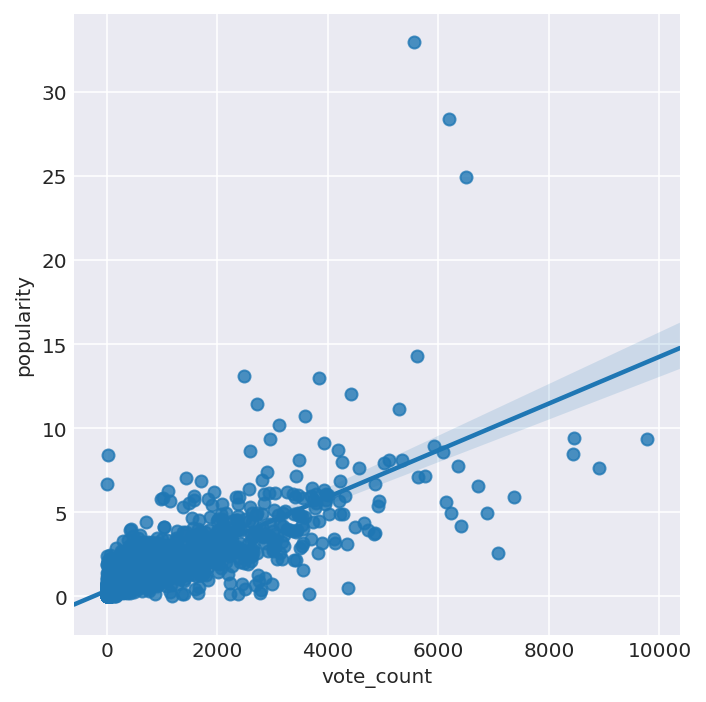

In [23]:
sns.lmplot(x='vote_count', y='popularity', data=df_analysis);

> There is positive correlation between populatity and vote_count. The estimated linear regression is shown as the blue line, the estimates varies in the light blue shade with 95% confident level.

<a id='q4'></a>
### Reach Question 4: What are the best and worst box office records in terms of revenue_adj, and corredponding to which leading actor, director and movies, respectively?

In [24]:
# Find the index which points to the highest box office

ind_box_high = df_analysis.index[df['revenue_adj'] == df_analysis['revenue_adj'].max()]
ind_box_high

Index(['Avatar'], dtype='object', name='original_title')

In [25]:
# print out the row of indicated index to see the complete information

df_analysis.loc[ind_box_high]


,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead
original_title,,,,,,,,,,,,,
Avatar,9.432768,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,Sam Worthington


> The highest box office among all the movies of the dataset was 2.827124e+09 dollor, and the title of this movie is "Avatar" which was released in 2009, the leading actor and director are 'Sam Worthington' and 'James Cameron', respectively.

In [26]:
# Find the index which points to the lowest box office which is higher than 0

box_low = df_analysis[df_analysis['revenue_adj']>0]
box_worst = box_low.index[box_low['revenue_adj'] == box_low['revenue_adj'].min()]
box_worst

Index(['Shattered Glass'], dtype='object', name='original_title')

In [27]:
# print out the row of indicated index to see the complete information

round(df_analysis.loc[box_worst], 2)


,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead
original_title,,,,,,,,,,,,,
Shattered Glass,0.46,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94,Drama|History,Lions Gate Films|Cruise/Wagner Productions|Bau...,2003-11-14,46,6.4,2003,7112115.87,2.37,Hayden Christensen


> The lowest box office among all the movies of the dataset was 2.37 dollor, and the title of this movie is 'Shattered Glass', which was released in 2003, the leading actor and director are 'Hayden Christensen' and 'Billy Ray', respectively.

<a id='q5'></a>
### Research Question 5:  What are the relationship bewteen popularity and box office as well vote_counts and box office?

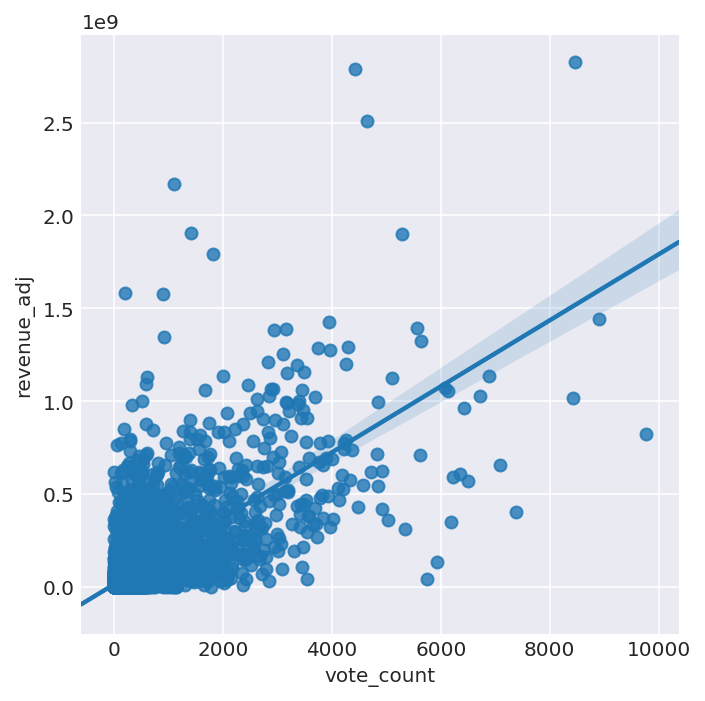

In [28]:
sns.lmplot(x='vote_count', y='revenue_adj', data=df_analysis);

> There is positive correlation between vote_counts and box office. The estimated linear regression is shown as the blue line, the estimates varies in the light blue shade with 95% confident level.

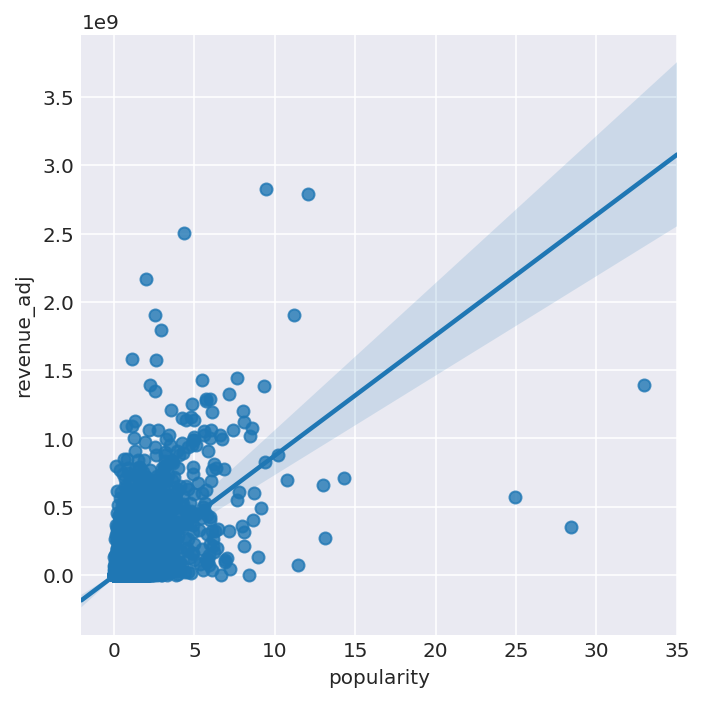

In [29]:
sns.lmplot(x='popularity', y='revenue_adj', data=df_analysis);

> There is positive correlation between populatity and box office. The estimated linear regression is shown as the blue line, the estimates varies in the light blue shade with 95% confident level.

<a id='q6'></a>
### Research Question 6:  What are the highest and lowerest budgets? Which movies are they corrsponding to respectivly?

In [30]:
# Find the index which points to the highest budget

ind_bud_high = df_analysis.index[df['budget_adj'] == df_analysis['budget_adj'].max()]
ind_bud_high

Index(['The Warrior's Way'], dtype='object', name='original_title')

In [31]:
# print out the row of indicated index to see the complete information

df_analysis.loc[ind_bud_high]

,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead
original_title,,,,,,,,,,,,,
The Warrior's Way,0.25054,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,11087569.0,Kate Bosworth


> The highest budget among all the movies of the dataset is 425000000 dollor, and the title of this movie is 'The Warrior's Way', which was released in 2010.

In [32]:
# Find the index which points to the lowest budget which is greater than 0

bud_low = df_analysis[df_analysis['budget_adj'] > 0]
ind_bud_worst = bud_low.index[bud_low['budget_adj'] == bud_low['budget_adj'].min()]
ind_bud_worst

Index(['Fear Clinic'], dtype='object', name='original_title')

In [33]:
round(df_analysis.loc[ind_bud_worst], 2)

,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead
original_title,,,,,,,,,,,,,
Fear Clinic,0.18,Thomas Dekker|Robert Englund|Cleopatra Coleman...,Robert Hall,95,Horror,Dry County Films|Anchor Bay Entertainment|Movi...,2014-10-31,15,4.1,2014,0.92,0.0,Thomas Dekker


> The lowest budget among all the movies of the dataset was 0.92 dollor, and the title of this movie is 'Fear Clinic', which was released in 2014.

<a id='q7'></a>
### Research Question 7: Selecting 1983 as inflation watershed, what is the total gross before and after it respectively?

The total gross before 1983 and after were 76.93 billion and 481.20 billion, respectively.


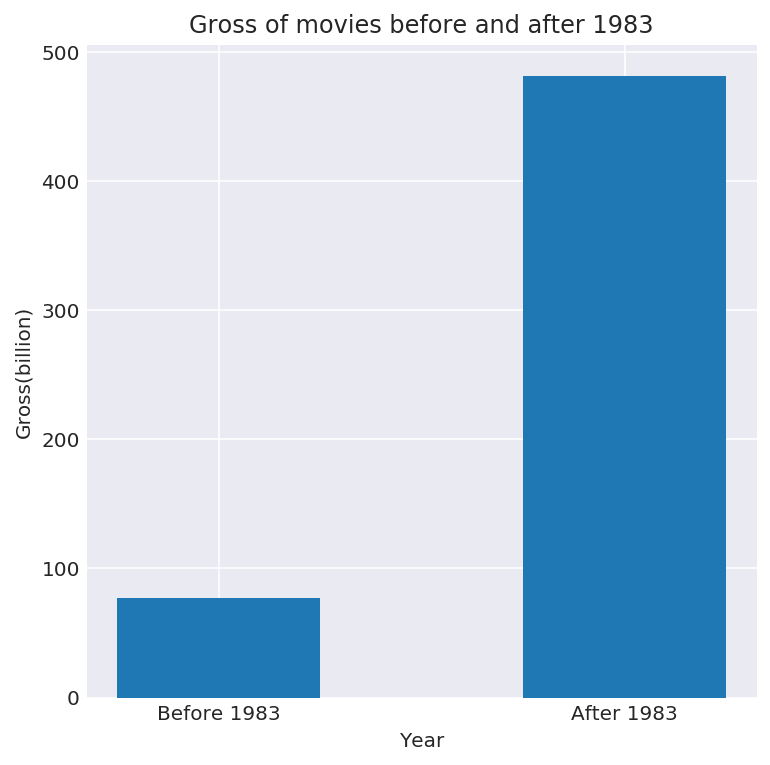

In [34]:
# Select rows of which the released_date is prior to 1975

pre1983 = df_analysis.query('release_year < 1983')

# Select rows of which the released_date is greater than 1975

after1983 = df_analysis.query('release_year >= 1983')

# Calculate the sum of box office in terms of revenue_adj before and after 1975, respectively

sum_pre1983 = pre1983.revenue_adj.sum()

sum_after1983 = after1983.revenue_adj.sum()

# print out the result with the unit of billion

print('The total gross before 1983 and after were {0:.2f} billion and \
{1:.2f} billion, respectively.'.format(sum_pre1983/(1e+9), sum_after1983/(1e+9)))

# Plot the resluts with bar chart 

plt.figure(figsize=(6,6))
plt.bar([1,2], [round(sum_pre1983/(1e+9), 2), round(sum_after1983/(1e+9), 2)]\
        , tick_label=['Before 1983', 'After 1983'], width=0.5)

plt.title('Gross of movies before and after 1983')
plt.xlabel('Year')
plt.ylabel('Gross(billion)');


<a id='q8'></a>
### Research Question 8: What is the sum of gross of all movies in 2009?

In [35]:
# Find the rows of which the released_date is equal to 2009

box_2009 = df_analysis.query('release_year == 2009')

# Calculate the sum of box office

print('The total gross in 2009 was {:.2f} billion.'.format(box_2009.revenue_adj.sum()/(1e+9)))

The total gross in 2009 was 22.54 billion.


<a id='q9'></a>
### Research Question 9: In which day, month and year of release, respectively, the movies possess the highest box office record ?

In [36]:
# Use groupby function to obtain the sum of box office in each year

box_year = df_analysis.groupby(['release_year'])['revenue_adj'].sum()

# Find out the index which points to the highest box office record by year

box_year.idxmax()



2015

In [37]:
print('The highest box office record in terms of released year is in 2015, \
which is {:.2f} billion dollor.'.format(box_year.loc[2015]/(1e+8)))

The highest box office record in terms of released year is in 2015, which is 246.21 billion dollor.


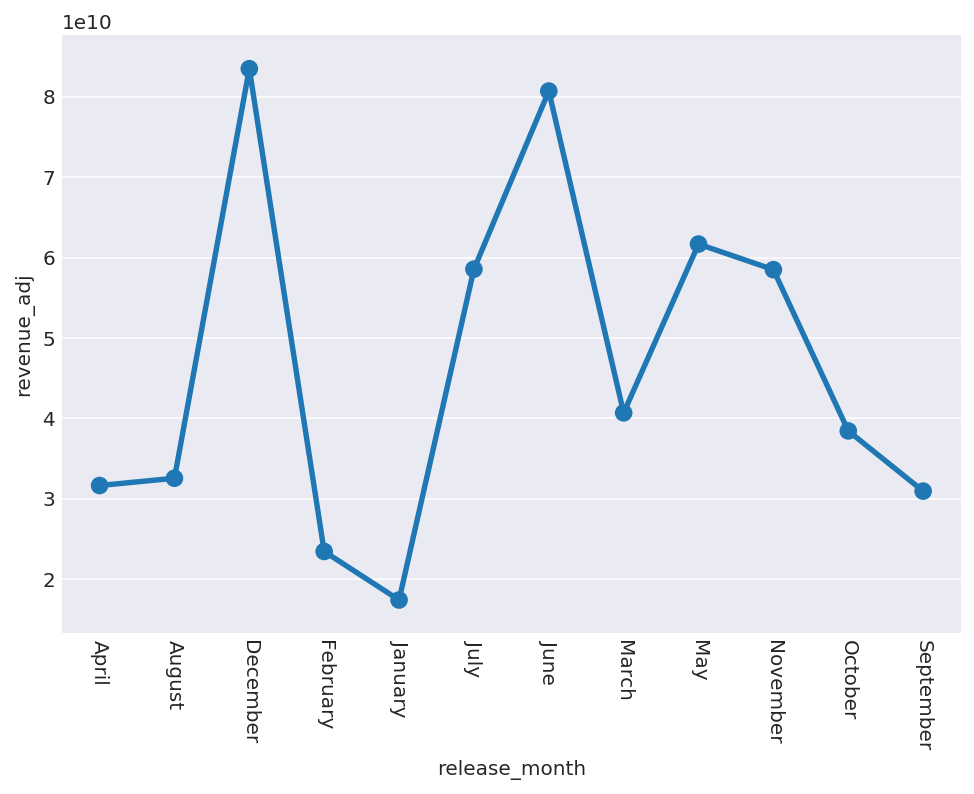

In [38]:
# Extract month from datetime column (release_date)

month_data = df_analysis.release_date.dt.strftime("%B")

# make a copy of data_analysis

df_month = df_analysis.copy()

# Add a new column of month 

df_month['release_month'] = month_data

# Use groupby function to obtain the sum of box office in each month.

box_month = df_month.groupby(['release_month'], as_index = False)['revenue_adj'].sum()

# Use factor plots which is easy to separate plots by categorical classes

sns.factorplot( x = 'release_month', y= 'revenue_adj', data = box_month, size =5, aspect=1.4);

plt.xticks(rotation=-90);



> Movies released in December possesses the highest box office record, which is around 90 billion dollors.

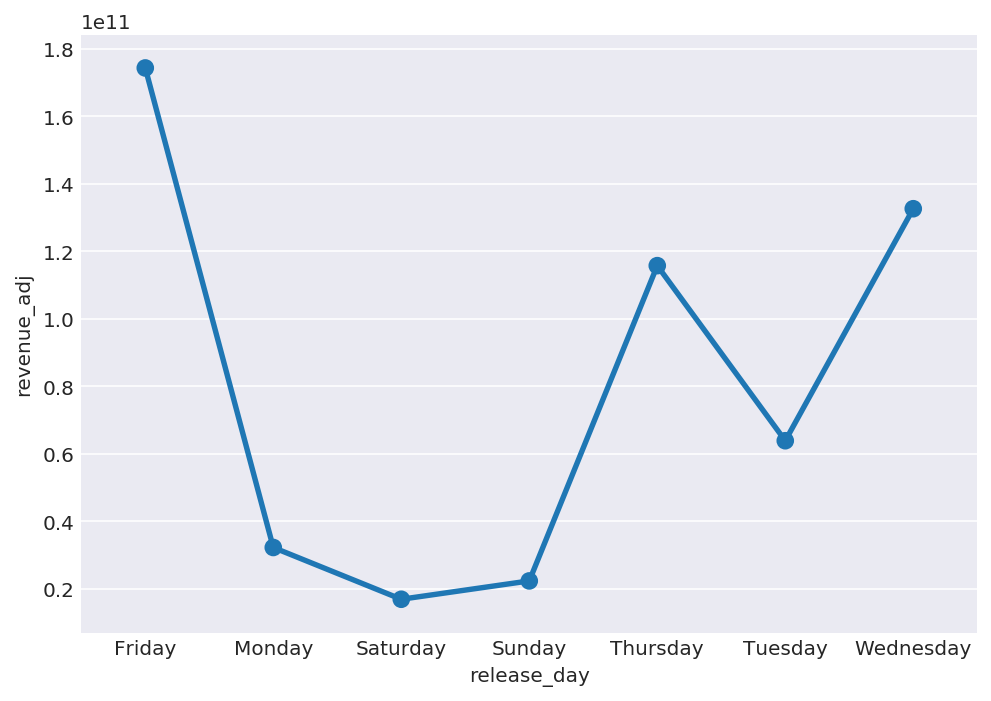

In [39]:
# Extract day from datetime column (release_date)

day_data = df_analysis.release_date.dt.strftime("%A")

# make a copy of data_analysis

df_day = df_analysis.copy()

# Add a new column of week day 

df_day['release_day'] = day_data

# Use groupby function to obtain the sum of box office in each weekd day

box_day = df_day.groupby(['release_day'], as_index = False)['revenue_adj'].sum()

# Use factor plots which is easy to separate plots by categorical classes
sns.factorplot( x = 'release_day', y= 'revenue_adj', data = box_day, size =5, aspect=1.4);


> The highest box office record in terms of released day is Friday, which holds around 180 billion dollor as shown in figure. 

<a id='q10'></a>
### Research Question 10: Which actor/actress participated in most movies?

In [40]:
# Remove the symobl '|' between actors/actress

cast_list = df_analysis.cast.apply(lambda x: x.split('|')).values

# Use function to put all the actors/actress in a list

def clean_cast(cast):
    actor_list = []
    for c in cast:
            actor_list.append(list.pop(c))        
                   
    return actor_list

actor_list_cleaned = clean_cast(cast_list)

# find the actor/actress who participated in most movies?

mode(actor_list_cleaned)





'No record'

In [41]:
# remove the 'No record' which is NaN values

for element in actor_list_cleaned:
    if 'No record' in actor_list_cleaned:
        actor_list_cleaned.remove('No record') 
        
mode(actor_list_cleaned)

'Steve Buscemi'

> According to the analysis, actor Steve Buscemi had participated the most amount of movies.

<a id='q11'></a>
### Research Question 11: Which compamy produced the most movies?

In [42]:
# Remove the symobl '|' between production companies

companies_list = df_analysis.production_companies.apply(lambda x: x.split('|')).values

# Use function to put all the production companies in a list

def clean_companies(companies):
    companies_list = []
    for c in companies:
            companies_list.append(list.pop(c))        
                   
    return companies_list

companies_list_cleaned = clean_cast(companies_list)

# find the actor/actress who participated in most movies

mode(companies_list_cleaned)



'No record'

In [43]:
# remove the 'No record' which is NaN values

for element in companies_list_cleaned:
    if 'No record' in companies_list_cleaned:
        companies_list_cleaned.remove('No record') 
        
mode(companies_list_cleaned)

'Warner Bros.'

> According to the analysis, 'Warner Bros.' company had produced the most amount movies.

<a id='q12'></a>
### Research Question 12: What is the most frequent type of movie?

In [44]:
# Remove the symobl '|' between genres

genres_list = df_analysis.genres.apply(lambda x: x.split('|')).values

# Use function to put all the production companies in a list

def clean_genres(genres):
    genres_list = []
    for g in genres:
            genres_list.append(list.pop(g))        
                   
    return genres_list

genres_list_cleaned = clean_cast(genres_list)

# find the actor/actress who participated in most movies

mode(genres_list_cleaned)



'Thriller'

> According to the analysis, the most frequent type of movie is 'Thriller'.

<a id='q13'></a>
### Research Question 13: Which leading actor/actress possess highest box office record by average and in total, respectively?

In [45]:
# Use groupby to find the mean box office in terms of 'revenue_adj' for each actor/actress 

cast_total = df_analysis.groupby(['lead'])['revenue_adj'].mean()

# Print out the actor/actress who possess highest box office record by average

cast_total.idxmax()

'Mark Hamill'

> 'Mark Hamill' possessed highest box office record by average.

In [46]:
# Use groupby to find the total box office in terms of 'revenue_adj' for each actor/actress 

cast_total = df_analysis.groupby(['lead'])['revenue_adj'].sum()

# Print out the actor/actress who possess highest box office record in total

cast_total.idxmax()

'Tom Cruise'

> 'Tom Cruise' possessed highest box office record in total.

<a id='q14'></a>
### Research Question 14: Does the highest ratio of revenue versus budget or budget versus revenue of movie suggest anything?

In [47]:
# Calculate the ratio of revenue versus budget

rev_bud = df_analysis.revenue_adj/df_analysis.budget_adj

# replace inf value with NaN value
rev_bud = rev_bud.replace([np.inf, -np.inf], np.nan)

# Drop NaN value

rev_bud.dropna()

# Print out the max value

round(rev_bud.max(),2)

1018619.28

In [48]:
# Copy df_analsis to analyze data

rev_bud_analysis = df_analysis

# Add another conlumn of ratio of revenue versus budget

rev_bud_analysis['revenue_budget_ratio'] = round(df_analysis.revenue_adj/df_analysis.budget_adj, 2)

# Print out first few lines to ckeck
rev_bud_analysis.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead,revenue_budget_ratio
original_title,,,,,,,,,,,,,,
Jurassic World,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,10.09
Mad Max: Fury Road,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,2.52
Insurgent,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,2.68
Star Wars: The Force Awakens,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,10.34
Furious 7,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,7.93


In [49]:
# Print the entire row to examine the complete info

round(rev_bud_analysis.query('revenue_budget_ratio == 1018619.28'), 2)

,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead,revenue_budget_ratio
original_title,,,,,,,,,,,,,,
"The Karate Kid, Part II",0.77,Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,113,Adventure|Drama|Action|Romance|Family,Columbia Pictures Corporation|Delphi V Product...,1986-06-18,211,5.8,1986,224.8,2.289886e+08,Ralph Macchio,1018619.28


> The max ratio of revenue versus budget is from movie 'The Karate Kid, Part II'. Its budget was only 224.8 dollor, whereas reveuen was around 0.23 billion dollor.

In [50]:
# Calculate the ratio of budget versus revenue

bud_rev = df_analysis.budget_adj/df_analysis.revenue_adj

# replace inf value with NaN value
bud_rev = bud_rev.replace([np.inf, -np.inf], np.nan)

# Drop NaN value

bud_rev.dropna()

# Print out the max value

round(bud_rev.max(),2)

4166666.6699999999

In [51]:
# Copy df_analsis to analyze data

bud_rev_analysis = df_analysis

# Add another conlumn of ratio of budget versus revenue

bud_rev_analysis['budget_revenue_ratio'] = round(df_analysis.budget_adj/df_analysis.revenue_adj, 2)

# Print out first few lines to ckeck
bud_rev_analysis.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead,revenue_budget_ratio,budget_revenue_ratio
original_title,,,,,,,,,,,,,,,
Jurassic World,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,10.09,0.10
Mad Max: Fury Road,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,2.52,0.40
Insurgent,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,2.68,0.37
Star Wars: The Force Awakens,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,10.34,0.10
Furious 7,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,7.93,0.13


In [52]:
# Print the entire row to examine the complete info

round(bud_rev_analysis.query('budget_revenue_ratio == 4166666.67'), 2)

,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,lead,revenue_budget_ratio,budget_revenue_ratio
original_title,,,,,,,,,,,,,,,
The House of the Spirits,0.45,Meryl Streep|Glenn Close|Jeremy Irons|Winona R...,Bille August,140,Romance|Drama,Det Danske Filminstitut|Spring Creek Productio...,1993-10-19,52,6.7,1993,37736749.04,9.06,Meryl Streep,0.0,4166666.67


> The max ratio of revenue versus budget is from movie 'The House of the Spirits'. Its budget was 37736749.04	 dollor, whereas reveuen was only 9.06 dollor.

<a id='q15'></a>
### Research Question 15: What is the distribution of box office?

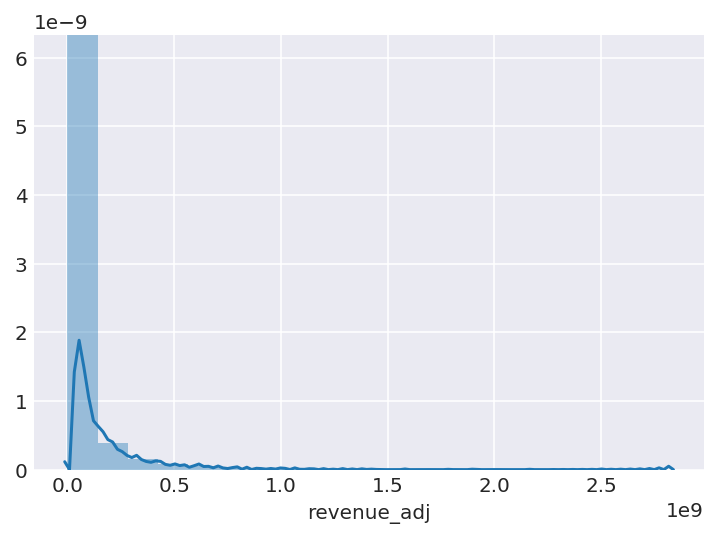

In [53]:
dis_rev = df_analysis.revenue_adj
sns.distplot(dis_rev, bins=20,hist=True);

In [54]:
df_analysis.revenue_adj.mean()

51369001.758842632

> The box office is right skewed, it is asymmetric with a long tail on the right, with the mean value around 51.37 million.


<a id='q16'></a>
### Researh Question 16: What is the distribution of vote_average?

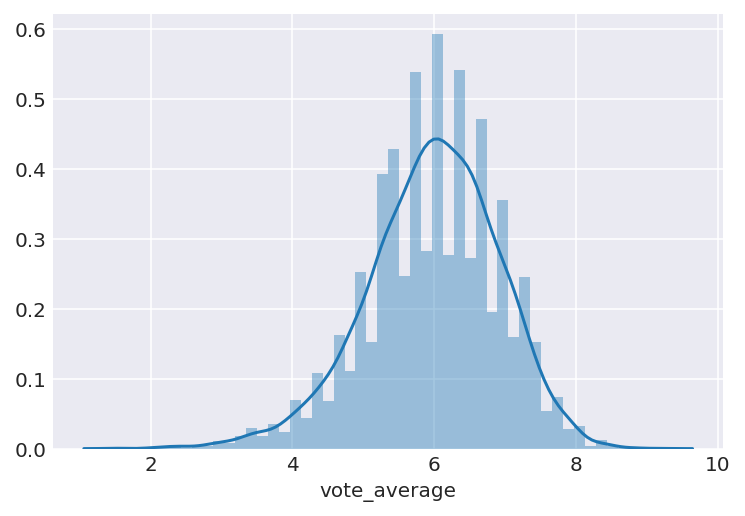

In [55]:
sns.distplot(df_analysis.vote_average);

> The vote_average is left skewed, it is asymmetric with a long tail on the left, with the mean value is around 6.


<a id='q17'></a>
### Research Question 17:  In which day, month and year does most movies released？

In [56]:
# Use groupby function to obtain the total movies number released in each year

r_day = df_analysis.groupby(['release_year']).count()['cast']

# Find out the index which points to the year of which most movies are released

r_day.idxmax()

2014

In [57]:
print('In 2014, most movies are released in history, and the total number is {}.'.format(r_day.loc[2014]))

In 2014, most movies are released in history, and the total number is 700.


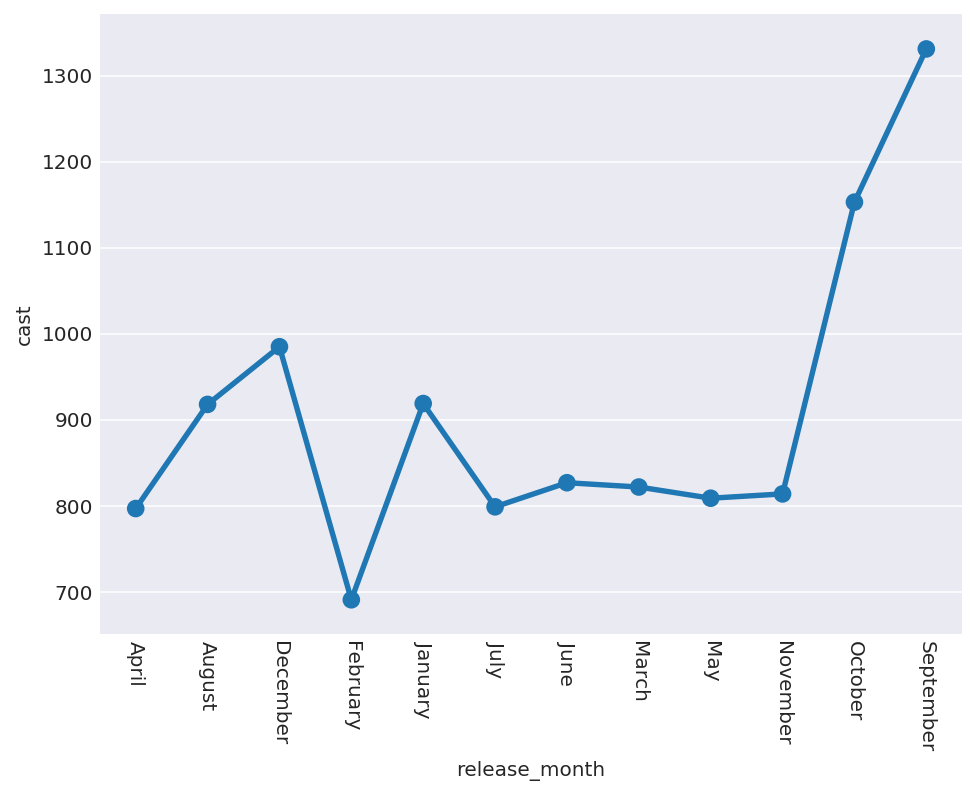

In [58]:
# Extract month from datetime column (release_date)

mon_data = df_analysis.release_date.dt.strftime("%B")

# make a copy of data_analysis

df_mon = df_analysis.copy()

# Add a new column of month 

df_mon['release_month'] = mon_data

# Use groupby function to obtain the total numbers of movies released in each month.

count_mon = df_month.groupby(['release_month'], as_index = False)['cast'].count()


# Use factor plots which is easy to separate plots by categorical classes

sns.factorplot( x = 'release_month', y= 'cast', data = count_mon, size =5, aspect=1.4);


plt.xticks(rotation=-90);

> According to analysis, in September most movies were released.

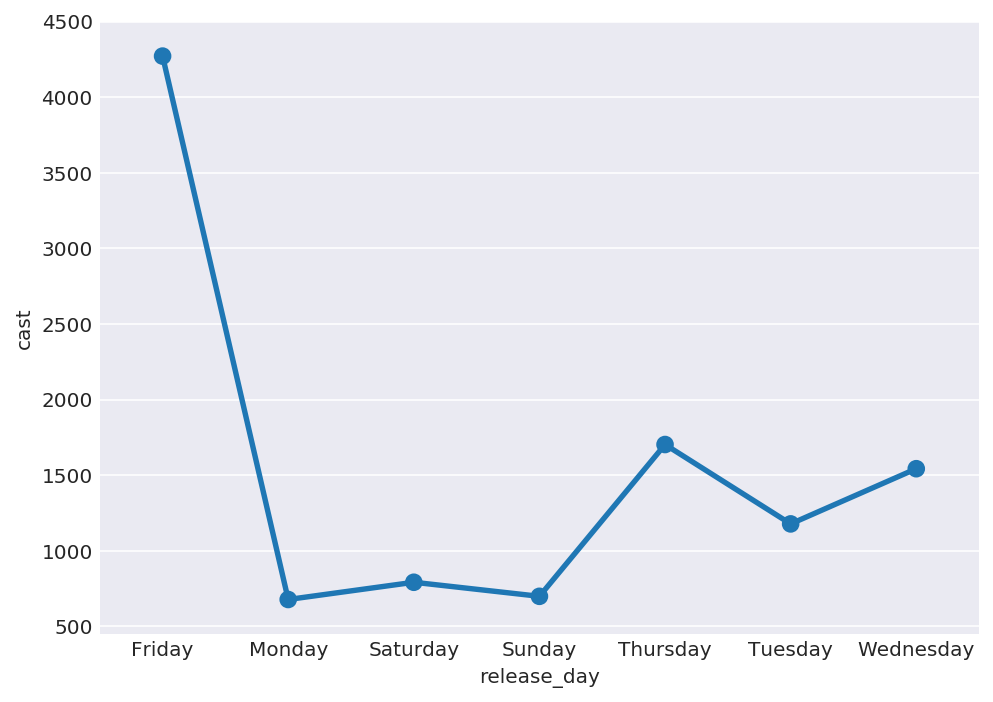

In [59]:
# Extract week day from datetime column (release_date)

d_data = df_analysis.release_date.dt.strftime("%A")

# make a copy of data_analysis

df_d = df_analysis.copy()

# Add a new column of month 

df_d['release_day'] = d_data

# Use groupby function to obtain the total numbers of movies released in each week day.

count_mon = df_d.groupby(['release_day'], as_index = False)['cast'].count()


# Use factor plots which is easy to separate plots by categorical classes

sns.factorplot( x = 'release_day', y= 'cast', data = count_mon, size =5, aspect=1.4);


> According to analysis, on Friday most movies were released.

<a id='q18'></a>
### Research Question 18: What is the relationsip of budget and revenue?

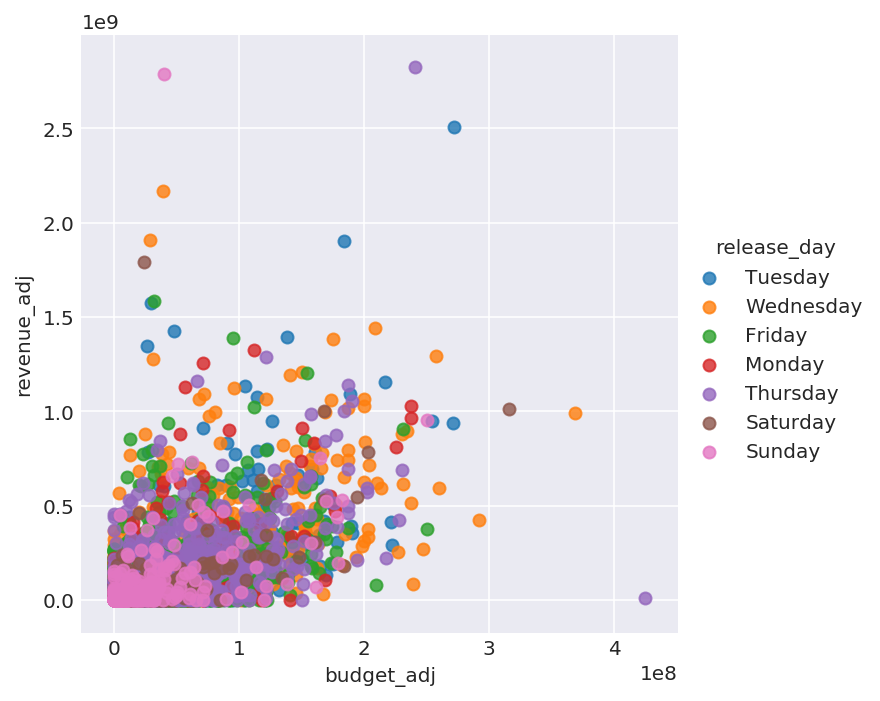

In [60]:
sns.lmplot(x='budget_adj', y='revenue_adj', data=df_d, fit_reg=False, hue='release_day');

> There is positive correlation between budget and revenue.

<a id='q19'></a>
### Research Question 19: Does the lenghth of movie affect its revenue? Group the movie by the lengh intervals, eg, below 120 mins, between 120 to 180 mins, above 180min, then compare the mean revenue of each group of movies.

In [61]:
time_low = df_mon.query('runtime < 120')
time_mid = df_mon.query('runtime >= 120 & runtime < 180')
time_high = df_mon.query('runtime >= 180')

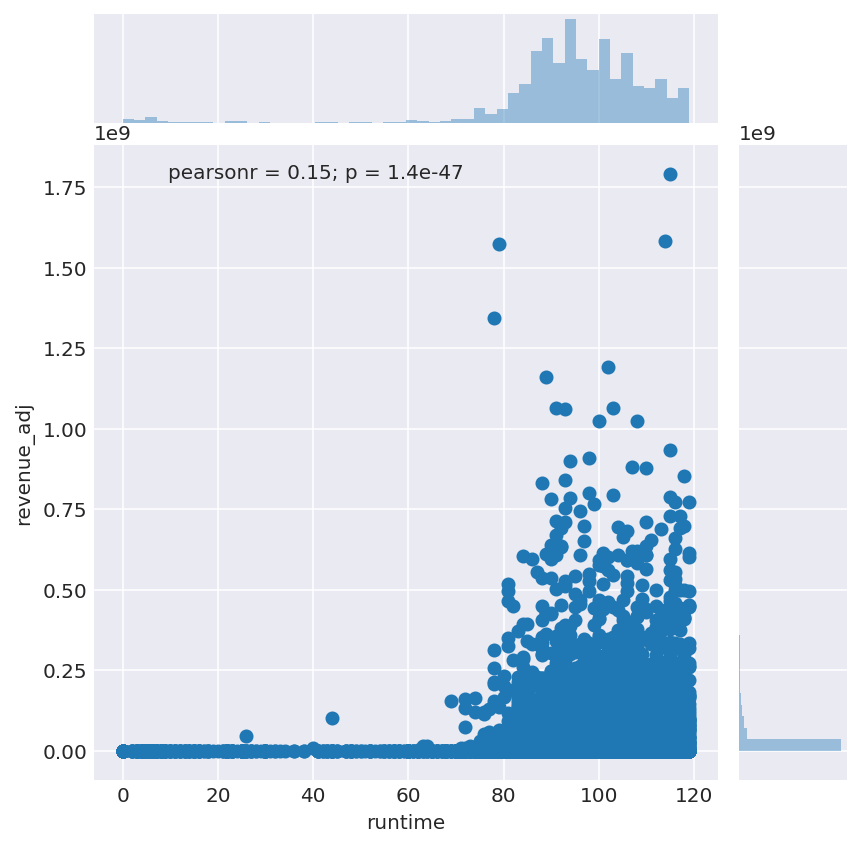

In [62]:

sns.jointplot(x='runtime', y='revenue_adj', data=time_low);

In [79]:
sns.lmplot(x='runtime', y='revenue_adj', data=time_mid,
           #fit_reg=False, 
           #hue='release_month');



SyntaxError: unexpected EOF while parsing (<ipython-input-79-348974b35038>, line 3)

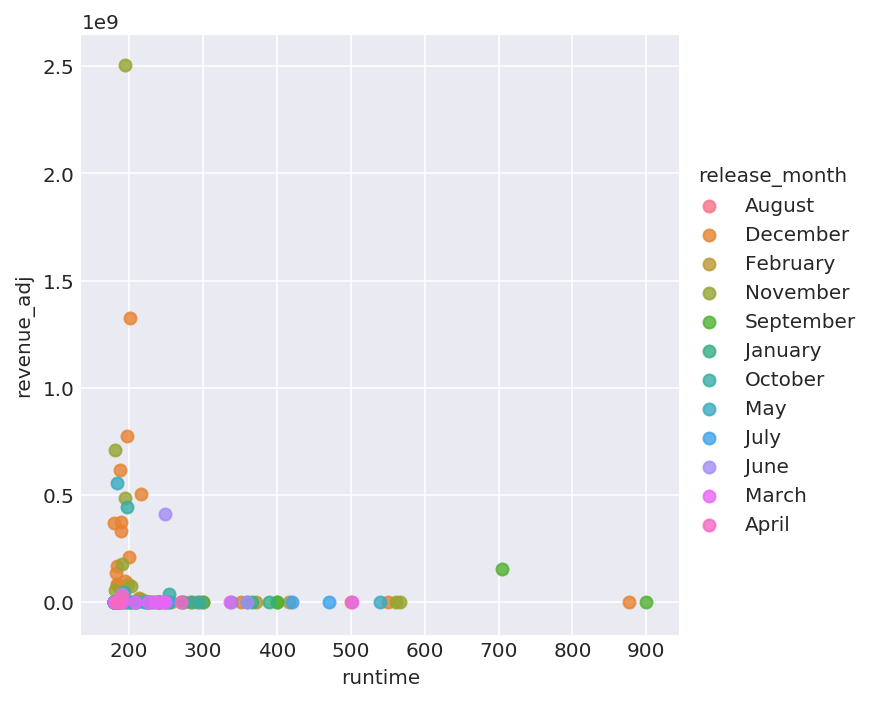

In [64]:
sns.lmplot(x='runtime', y='revenue_adj', data=time_high,
           fit_reg=False, 
           hue='release_month');

> There is a strong positive correlation between revenue and runtime below 120 mins as well as in the range of 120 and 180 mins; no apprent correlation was noticed between revenue and runtime above 180 mins.

<a id='q20'></a>
### Research Question 20: Which genres are most popular from year to year?

In [65]:
# Put unique in a list

year_list = df_analysis.release_year.sort_values(ascending=True).unique().tolist()


# Create an empty dataframe for later analysis

pop_gen = pd.DataFrame(index = year_list, columns = ['genre'])

# Use loop to add row and values in dataframe

for ye in year_list:
    
    year = df.query('release_year == @ye')['popularity']
    
    ind_pop = year.idxmax()
    
    pop_gen.loc[ye] = df.iloc[ind_pop]['genres']
    

# Print out the result

print(pop_gen)



                                                  genre
1960                           Action|Adventure|Western
1961                               Comedy|Drama|Romance
1962                        Adventure|Drama|History|War
1963                                   Animation|Family
1964                                   Drama|Comedy|War
1965                         Drama|Family|Music|Romance
1966                              Drama|Science Fiction
1967                               Comedy|Drama|Romance
1968                  Adventure|Science Fiction|Mystery
1969                        History|Drama|Western|Crime
1970                  Adventure|Science Fiction|Mystery
1971                                     Family|Fantasy
1972                           Drama|Adventure|Thriller
1973                              Drama|Horror|Thriller
1974                       Crime|Drama|Mystery|Thriller
1975                          Horror|Thriller|Adventure
1976                                            

<a id='q21'></a>
### Research Question 21:  What kinds of properties are associated with movies that have high revenues?

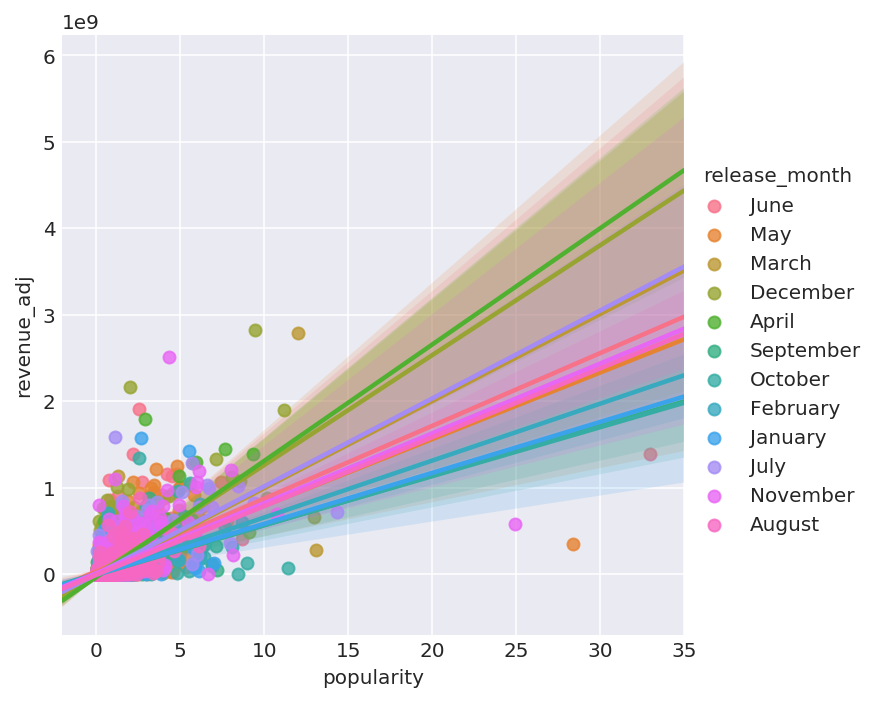

In [66]:
# Relationship of popularity and revenue

sns.lmplot(x = 'popularity', y = 'revenue_adj', hue = 'release_month', data = df_mon);

> Popularity and reveune are positively correlated, which means high popularity associated with high reveune.

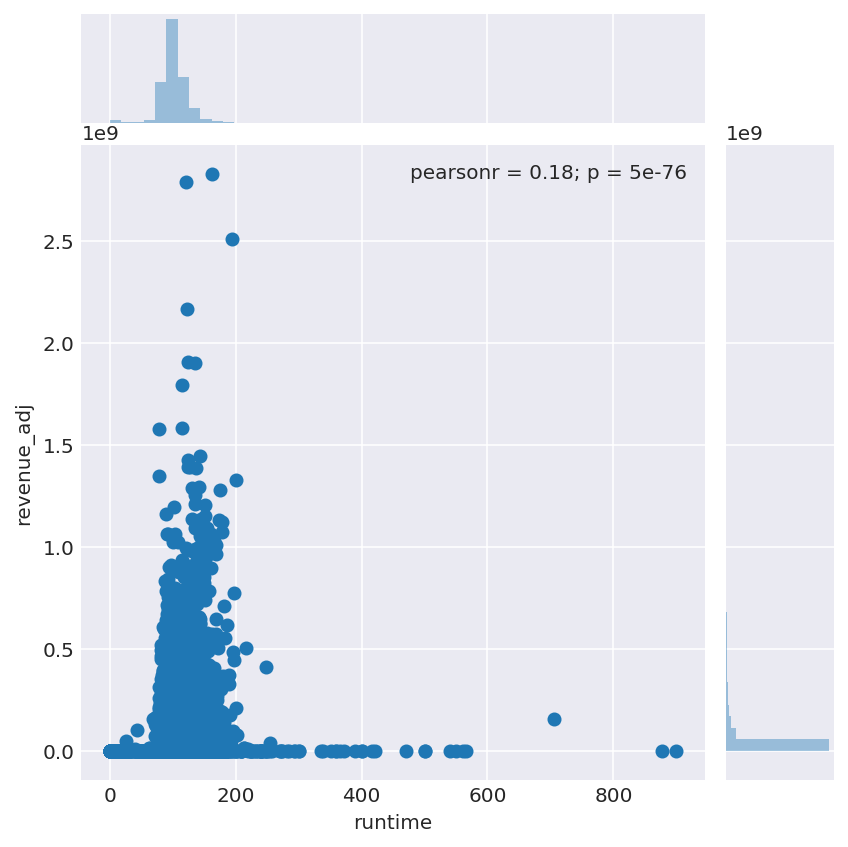

In [67]:
# Relationship of runtime and revenue

sns.jointplot(x='runtime', y='revenue_adj', data=df_analysis);

> As shown above, revenue regariding runtime is right skewed. Runtime between 120 and 180 mins are most profitable, with around 150 mins are highest. Runtime being too short or too long would lead to low revenue.

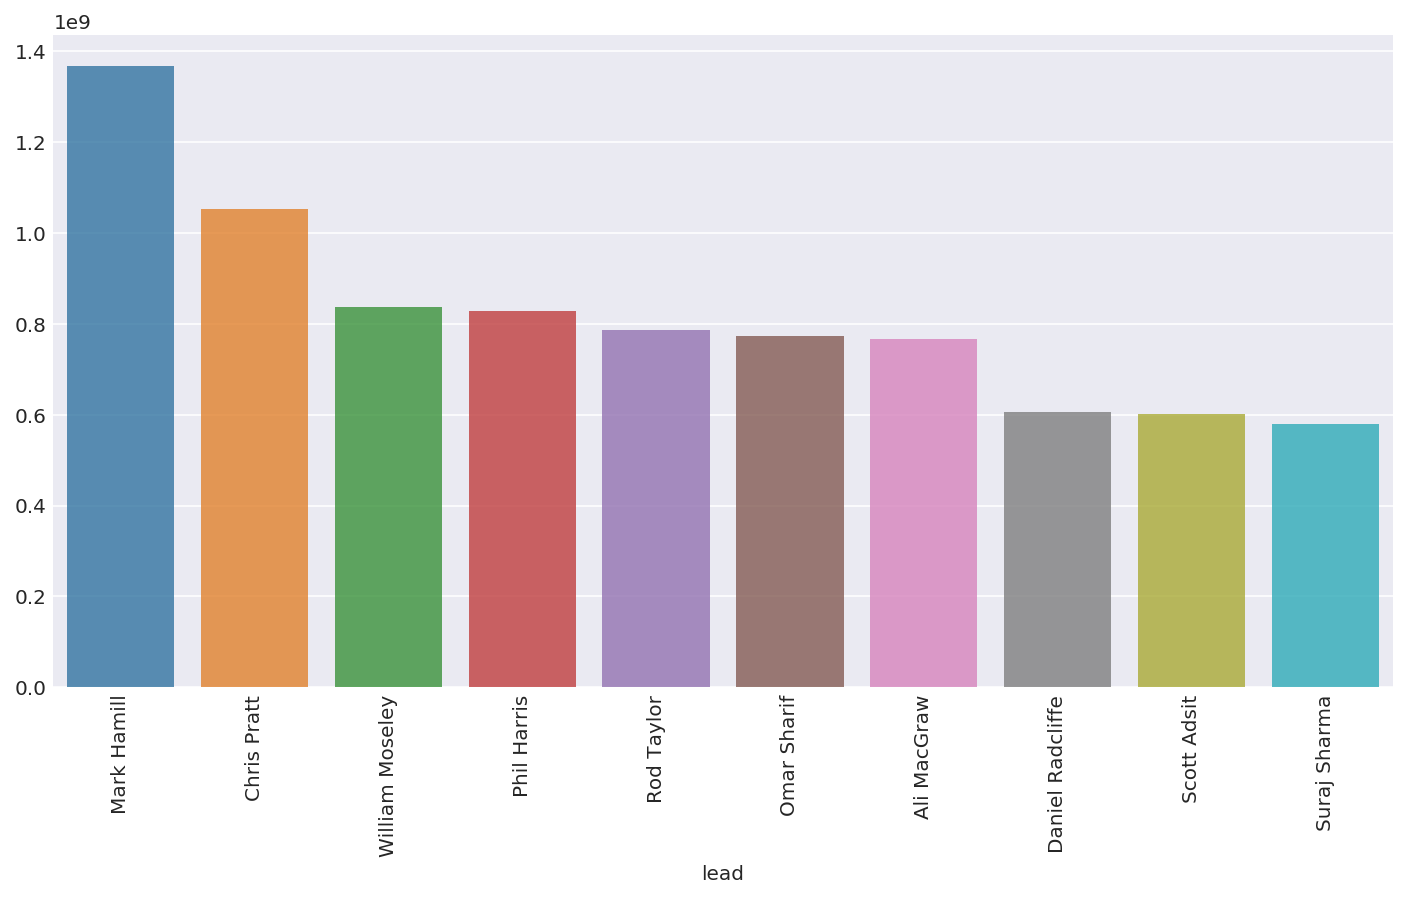

In [68]:
# Investigate leading actor's average contirbution on each single movie
# Find out the corresponding average value

lead_rev = df_analysis.groupby(['lead'])['revenue_adj'].sum()/df_analysis.groupby(['lead'])['revenue_adj'].count()

# Select the top 10 leading actors to plot

lead_rev = lead_rev.nlargest(n = 10)
plt.subplots(figsize = (12,6))
plt.xticks(rotation=90)
sns.barplot(lead_rev.index,lead_rev.tolist(), alpha = 0.8);


> The leading actor has great impact on the reveune, eg, the top 10 leading actor contribute from around 0.65 to 1.4 billion per movie averagely.

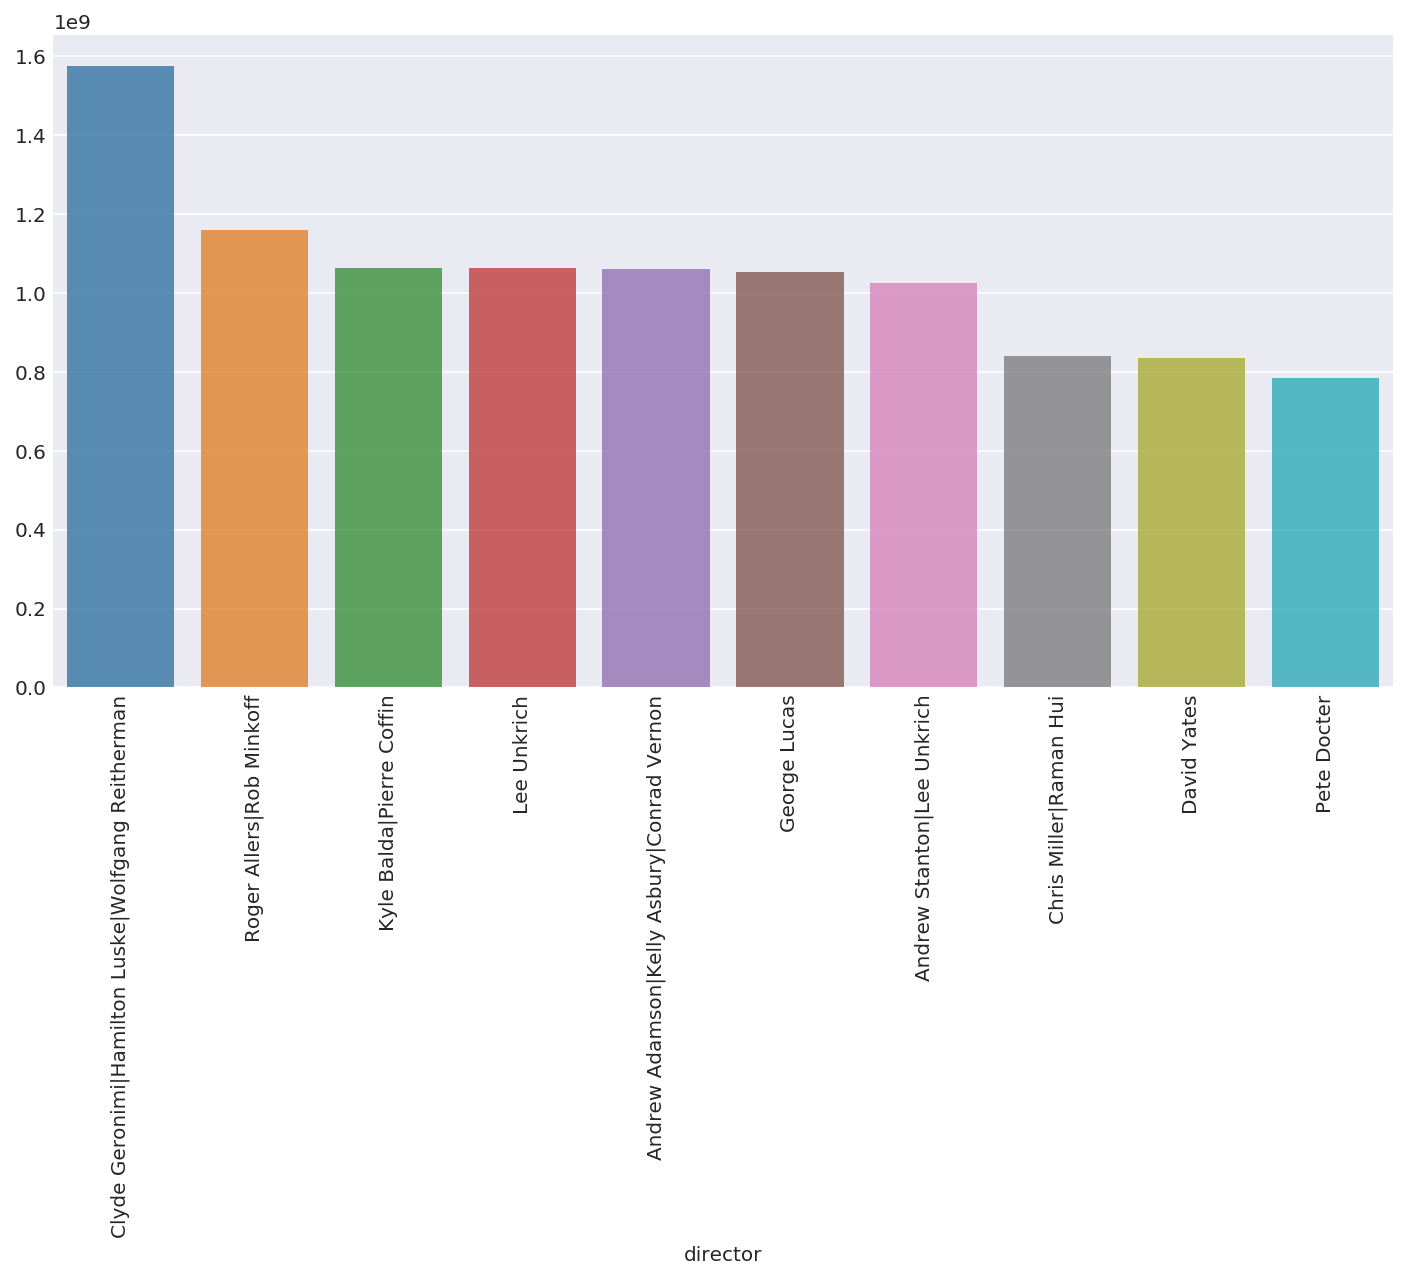

In [69]:
# Investigate director's average contirbution on each single movie
# Find out the corresponding average value

dre_rev = df_analysis.groupby(['director'])['revenue_adj'].sum()/df_analysis.groupby(['director'])['revenue_adj'].count()

# Select the top 10 director to plot

dre_rev = dre_rev.nlargest(n = 10)
plt.subplots(figsize = (12,6))
plt.xticks(rotation=90)
sns.barplot(dre_rev.index,dre_rev.tolist(), alpha = 0.8);

> The director has great impact on the reveune, eg, the top 10 leading actor contribute from around 0.8 to 1.6 billion per movie averagely.

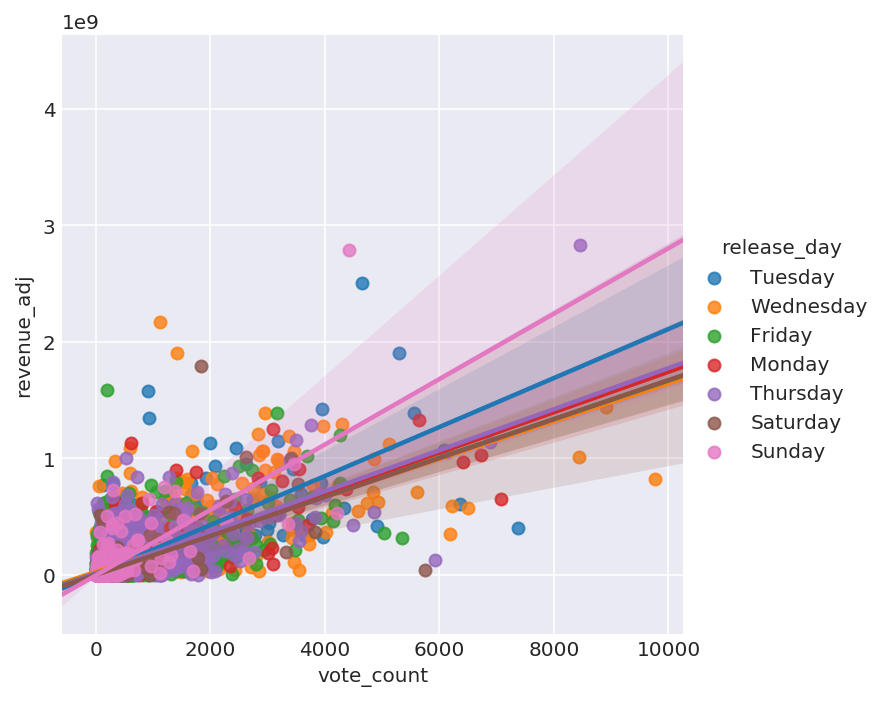

In [70]:
# Relationship of vote_count and revenue

sns.lmplot(x='vote_count', y='revenue_adj', hue = 'release_day', data=df_d);

> Vote_counts and reveune are positively correlated, which means high vote_counts associated with high reveune.

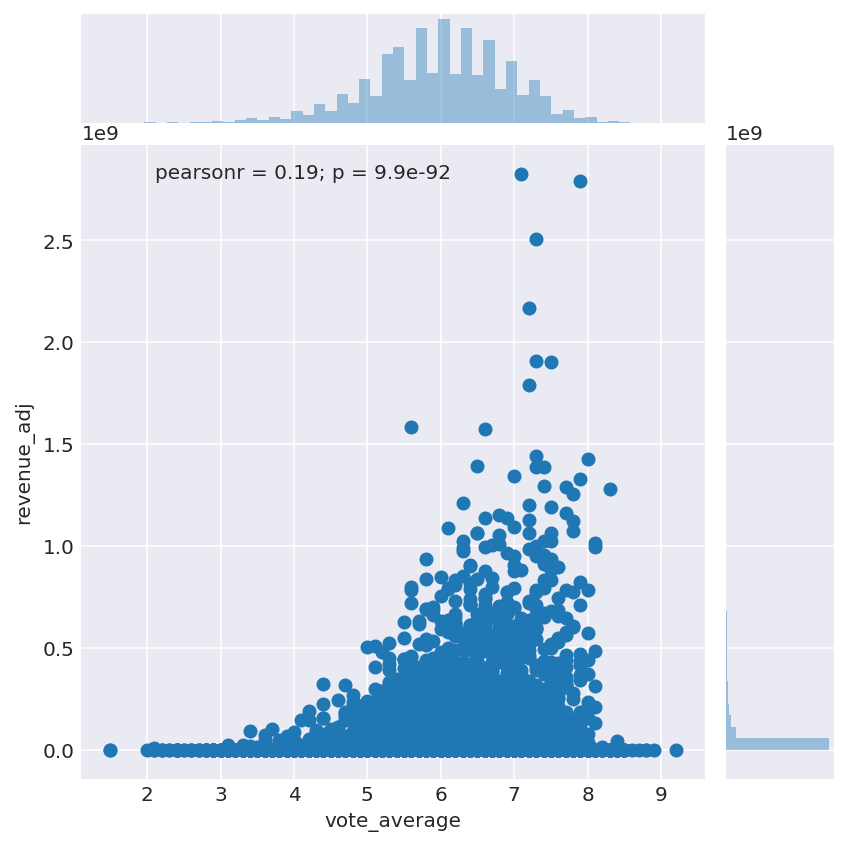

In [71]:
# Relationship of vote_average and revenue

sns.jointplot(x='vote_average', y='revenue_adj', data=df_analysis);

> As shown above, the distribution of revenue regarding to vote_average is left skewed. When vote_average is between 5 and 8 points is most profitable with 7 at the highest. Vote_average being too small or too big would lead to low revenue.

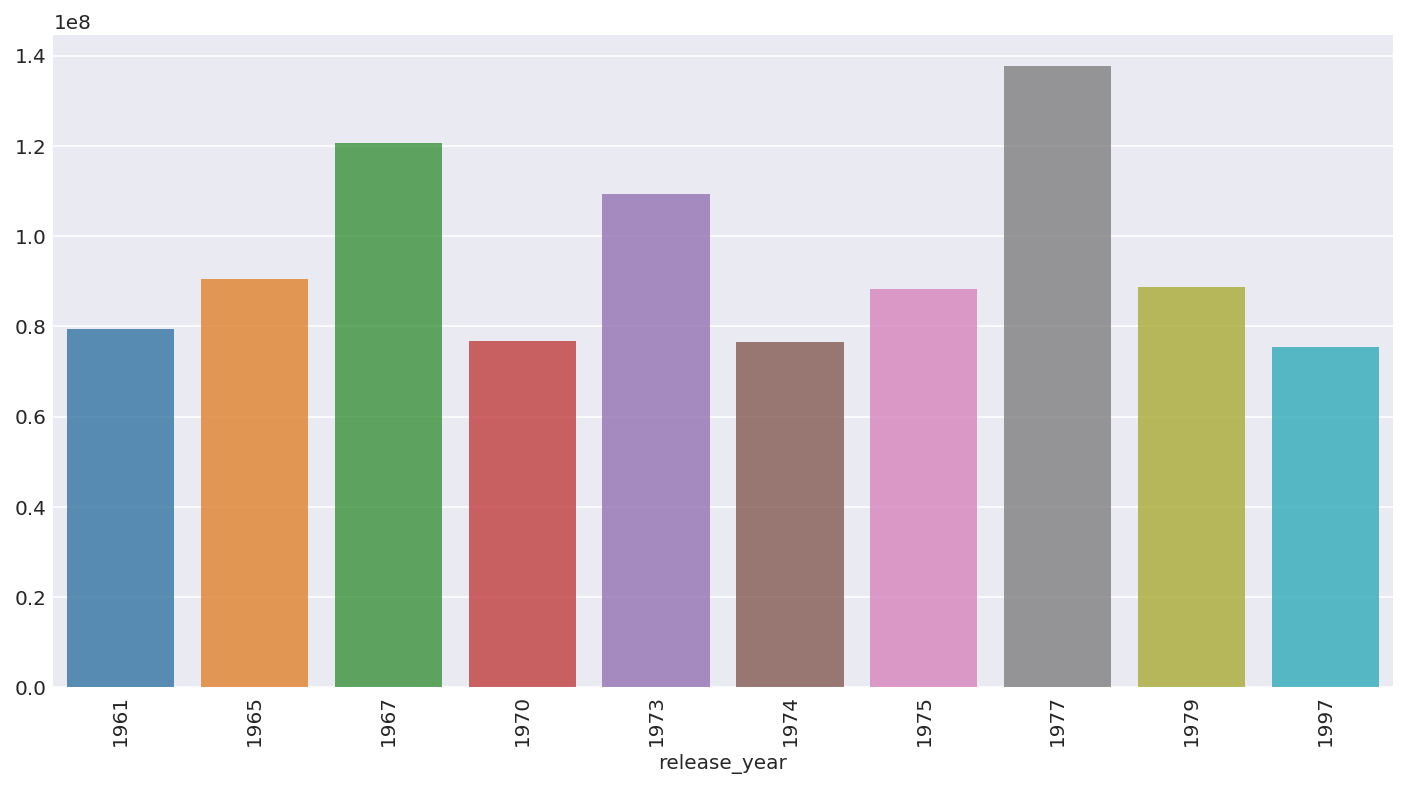

In [72]:
# Investigate relationship of release year and revenue
# Find out the corresponding average value

reyr_rev = df_analysis.groupby(['release_year'])['revenue_adj'].sum()/df_analysis.groupby(['release_year'])['revenue_adj'].count()

# Select the top 10 director to plot

reyr_rev = reyr_rev.nlargest(n = 10)
plt.subplots(figsize = (12,6))
plt.xticks(rotation=90)
sns.barplot(reyr_rev.index,reyr_rev.tolist(), alpha = 0.8);

> The release year is important determinant for reveune, as shown above in the top 10 release year, average revenue per movie ranging from around 80 million to 0.14 billion.

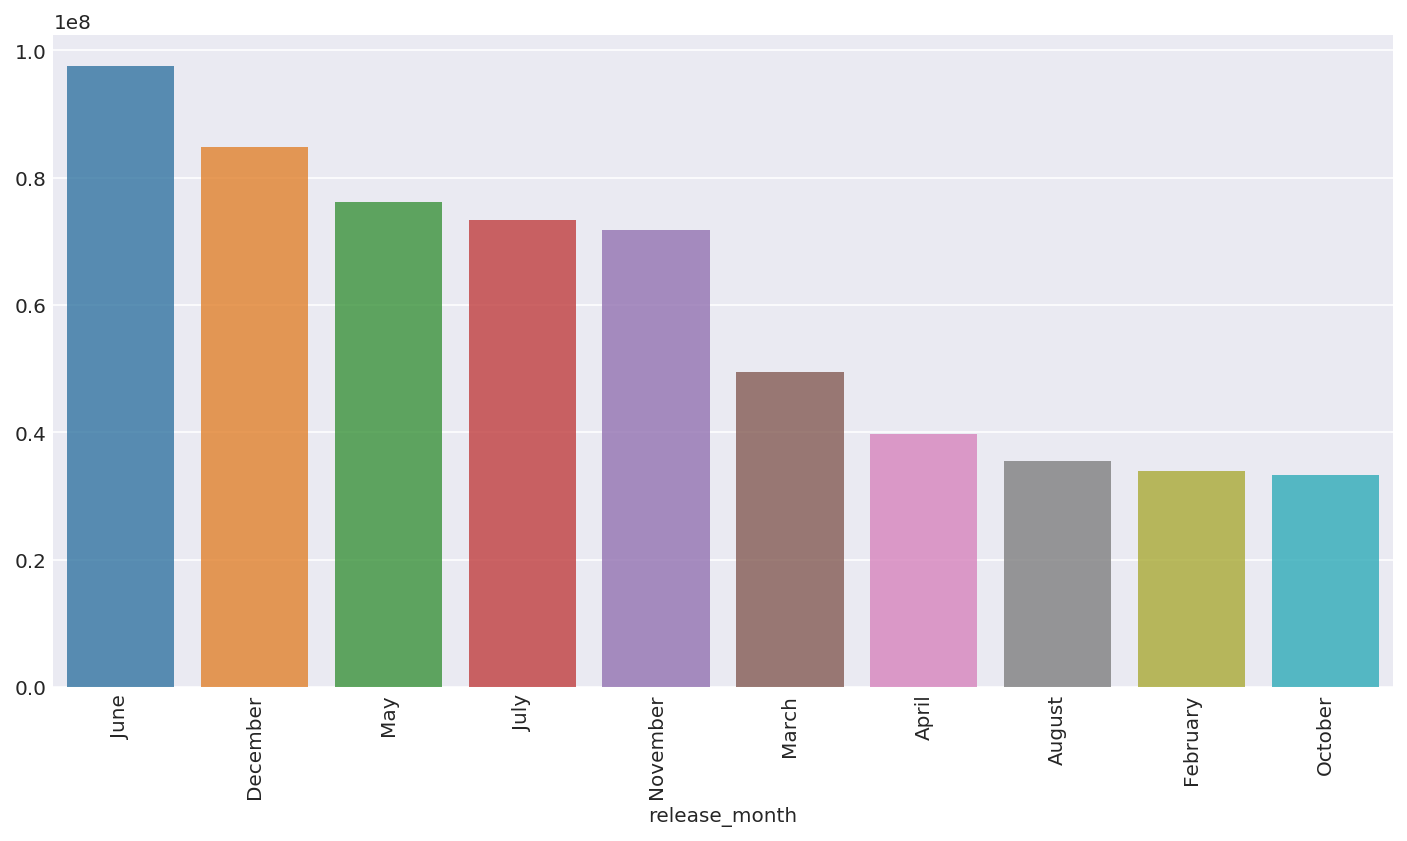

In [73]:
# Investigate relationship of release month and revenue
# Find out the corresponding average value

remon_rev = df_mon.groupby(['release_month'])['revenue_adj'].sum()/df_mon.groupby(['release_month'])['revenue_adj'].count()

# Select the top 10 director to plot

remon_rev = remon_rev.nlargest(n = 10)
plt.subplots(figsize = (12,6))
plt.xticks(rotation=90)
sns.barplot(remon_rev.index,remon_rev.tolist(), alpha = 0.8);

> The release month is important determinant for reveune, as shown above in the top 10 release month, average revenue per movie ranging from around 35 million to 0.1 billion.

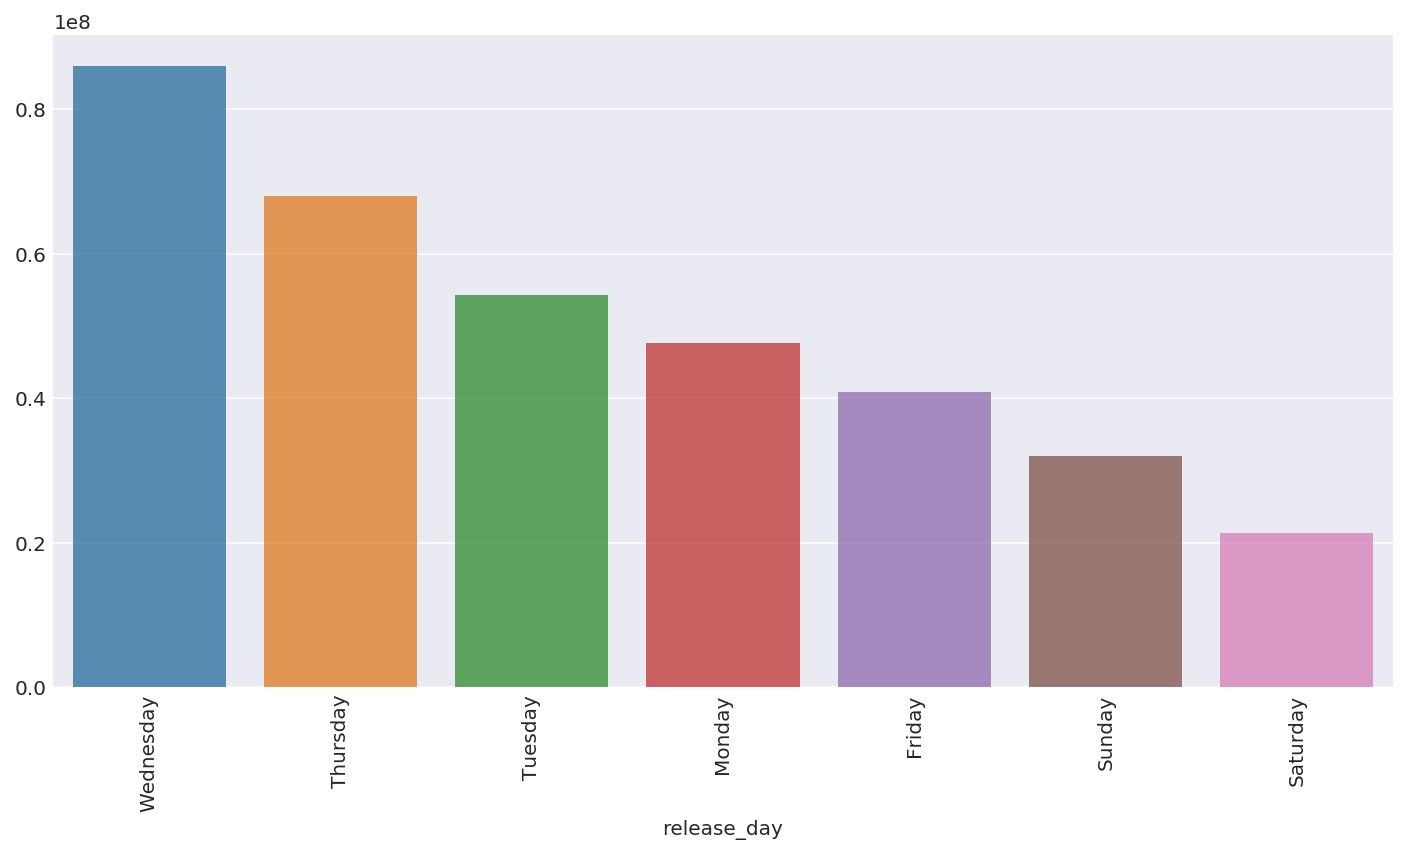

In [74]:
# Investigate relationship of release day and revenue
# Find out the corresponding average value

reday_rev = df_d.groupby(['release_day'])['revenue_adj'].sum()/df_d.groupby(['release_day'])['revenue_adj'].count()

# Select the top 10 director to plot

reday_rev = reday_rev.nlargest(n = 10)
plt.subplots(figsize = (12,6))
plt.xticks(rotation=90)
sns.barplot(reday_rev.index,reday_rev.tolist(), alpha = 0.8);

> The release day is important determinant for reveune, as shown above in the top 10 release day, average revenue per movie ranging from around 20 to 90 million.

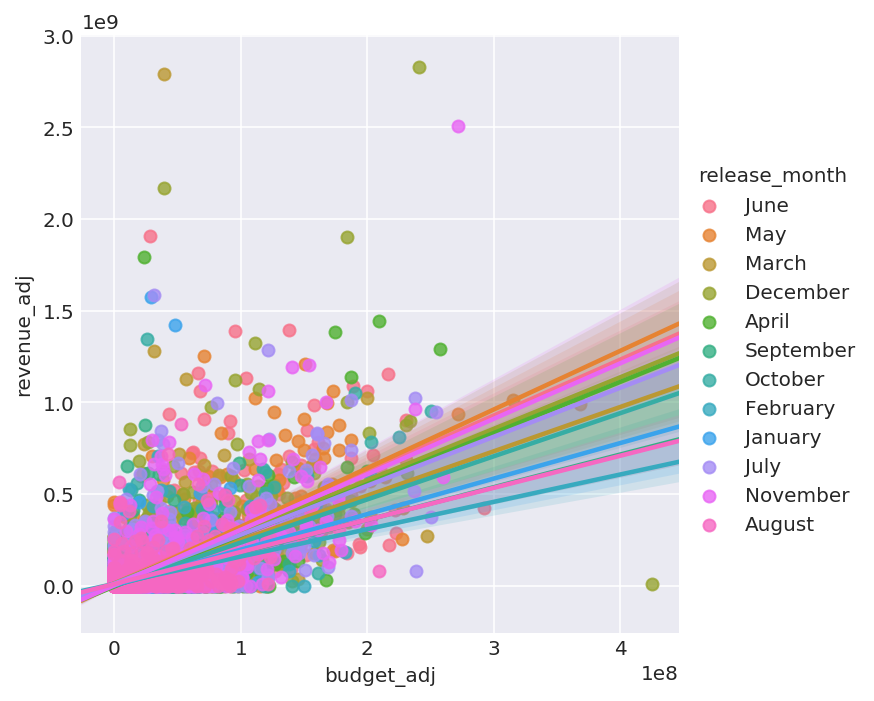

In [75]:
# Relationship of budget and revenue

sns.lmplot(x='budget_adj', y='revenue_adj', hue = 'release_month', data=df_mon);

> Budget and reveune are positively correlated, which means high budgets associated with high reveune.

<a id='conclusions'></a>
## Conclusions
> In current study, a good amount of profound analysis has been carried out. Prior to each step, deailed instructions was given and interpretions was also provided afterwards. The dataset included 10866 pieces of film information ranging from 1960 to 2015, which consisted most of the main stream movies. Based on such substantial data, the analysis would be more reliable as opposed to small scale analysis. The limitations of current study were NaN values, which could affect the process  of analysis. Luckily, those NaN values  were all of category type, thus it has limited impact on arithmetric computing.

> However, it might matter when comparing category column with numerical column for analysis. The stragety appiled in current study is to keep those NaN value, but convert them as 'No record' which is a string type of data. Among the 19 questions, only 2 questions were affected by the NaN value, thus most of the analysis are highly reliable.


In [76]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_TMDb_Movie_Data_20180108.ipynb'])

0